In [1]:
import math
from collections import defaultdict
import pdb


def calculate_f_kp(f, k, p, a, b):
    m = len(a)
    n = len(b)
    
    if(k<0):
        f[k, int(math.fabs(k))-1] = int(math.fabs(k))-1
    else:
        f[k, int(math.fabs(k))-1] = -1
    
    t = max(f[k,p-1]+1, f[k-1,p-1], f[k+1,p-1]+1)
    pdb.set_trace()
    while(t>-2 and (t < m and t+k < n) and a[t]==b[t+k]):
        t = t+1
   
    if(t>m or t+k>n):
        f[k,p] = -1000
    else:        
        f[k,p] = t
        
    
def editDistance(a, b):
    f = defaultdict(lambda:-1000)
    
    m = len(a)
    n = len(b)
    p = -1
    r = p - min(m,n)
    
    while(f[n-m, p]!=m):
        p = p+1
        r = r+1
        
        if(r<=0):            
            for k in range(-p,p+1):
                calculate_f_kp(f, k, p, a, b)
        else:
            for k in range(max(-m,-p), min(n,p)+1):
                calculate_f_kp(f, k, p, a, b)
        
    s = p
    return s

a = ''
b = 'qwewqe'
    

In [ ]:
editDistance(a, b)

> <ipython-input-1-4532b355de43>(17)calculate_f_kp()
-> while(t>-2 and (t < m and t+k < n) and a[t]==b[t+k]):
(Pdb) p a
''
(Pdb) p b
'qwewqe'
(Pdb) f
defaultdict(<function editDistance.<locals>.<lambda> at 0x10baf2158>, {(6, -1): -1000, (0, -1): -1, (-1, -1): -1000, (1, -1): -1000})


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

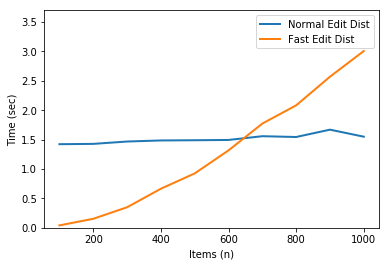

In [95]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(100, 1000+10, 100)
e = [
    1.4226,
1.4280,
1.4680,
1.4864,
1.4899,
1.4949,
1.5587,
1.5450,
1.6699,
1.5503]
e_f = [
    0.0411,
0.1533,
0.3492,
0.6648,
0.9253,
1.3171,
1.7731,
2.0837,
2.5707,
3.0080]
line, = plt.plot(t, e, lw=2, label="Normal Edit Dist")
line2, = plt.plot(t, e_f, lw=2, label="Fast Edit Dist")

plt.ylim(0,3.7,0.1)
plt.ylabel('Time (sec)')
plt.xlabel('Items (n)')
plt.legend()
plt.show()